Optimization terminated successfully.
         Current function value: 208.953912  
         Iterations: 138
weights ridge: [ -3.04634035e+00   4.47411947e-03   4.82210324e+01   1.24703504e+01]
weights module: [ -2.83245223e+00   1.05564300e-02   3.07481879e+01   1.76187408e+01]
mse ridge: 26.6076896317
mse module: 29.3611091245


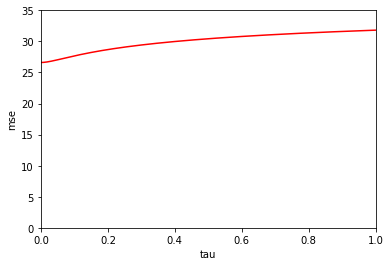

In [3]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

def readFile():
    x=[]
    y=[]
    with open('basketball.csv', 'rb') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            if(reader.line_num>1):
                x.append([float(k) for k in row[0:4]])
                y.append(float(row[4]))
    return x, y

def ridge_regression_inverse_matrix(tau,(x,y)):
    x = np.transpose(np.matrix(x))
    m,n = x.shape
    inv_matrix = np.linalg.inv(np.add(np.dot(x,np.transpose(x)),np.diag([tau]*m)))
    w = np.array(np.squeeze(np.asarray(np.dot(np.dot(inv_matrix,x),y))))
    return w

def ridge_regression_svd(tau,(x,y)):
    x = np.transpose(np.matrix(x))
    (m,n) = x.shape
    (u,s,v) = np.linalg.svd(x)
    d = np.zeros((m,n))
    d[:len(s), :len(s)] = np.diag([(i/(i*i+tau)) for i in s])
    w = np.array(np.squeeze(np.asarray(np.dot(np.dot(np.dot(u,d),v),y))).tolist())
    return w

def apply_w_to_x(x,w):
    return np.dot(np.matrix(x),w).tolist()[0]

def get_y_for_tau(x,y,tau):
    return apply_w_to_x(x,ridge_regression_svd(tau,(x,y)))

def count_mse(y_real, y_regression):
    m = len(y_real)
    return sum([(y_real[i]-y_regression[i])**2 for i in range(m)])/m

def module_regression_linear(x,y):
    (x,y) = readFile()
    x_height = len(y)
    x_width = len(x[0])
    c =  [0] * x_width + [1] * x_height
    I = (-np.identity(x_height)).tolist()
    A = [x[i]+I[i] for i in range(x_height)]+[[-x[i][j] for j in range(x_width)] +I[i] for i in range(x_height)]
    b = y + [-i for i in y]
    bounds = [(None,None)] * x_width + [(0.0,None)]*x_height
    from scipy.optimize import linprog
    res = linprog(c, A_ub=A, b_ub = b, bounds=bounds,options={"disp": True, "bland": True, "tol": 0.001})
    w = res.x[:x_width]
    return w


taus = []
mses = []
tau = 0.0
(x,y)=readFile()
w_regr_ridge = ridge_regression_svd(tau,(x,y))
y_regr_ridge = apply_w_to_x(x, w_regr_ridge)
mse_ridge = count_mse(y,y_regr_ridge)

w_regr_module = module_regression_linear(x,y)
y_regr_module = apply_w_to_x(x, w_regr_module)
mse_module = count_mse(y,y_regr_module)

print "weights ridge:", w_regr_ridge
print "weights module:", w_regr_module
print "mse ridge:", mse_ridge
print "mse module:", mse_module

while tau < 1:
    y_regr = get_y_for_tau(x,y,tau)
    mse = count_mse(y,y_regr)
    taus.append(tau)
    mses.append(mse)
    tau +=0.001
plt.plot(taus,mses,"r")
plt.xlabel("tau")
plt.ylabel("mse")
plt.axis([0,1,0,35])
plt.show()